In [1]:
import numpy as np
import pandas as pd
import preprocess_data as prep
from models import build_bi_lstm, train_model_using_cross_val
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from models import sum_regions_predictions
from keras.models import load_model

# Load the model
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

'''
This script is used to train the model for a specific STATE and forecast the cases on a 
specific year (TEST_YEAR). The model is trained  with the regional health data before the year selected. 
'''
STATE = 'GO'
TEST_YEAR = 2024
MODEL_NAME = 'att'

df_all = prep.load_cases_data()
enso = prep.load_enso_data()

df = df_all.loc[df_all.uf == STATE]

cols_to_norm = ['casos','epiweek', 'enso',  'R0', 'total_cases',
                          'peak_week', 'perc_geocode'] 




In [2]:
%%time
# load the model
model = load_model(f'./saved_models/model_{STATE}_2022_{MODEL_NAME}.keras')

df_preds = sum_regions_predictions(model, df, enso, TEST_YEAR, cols_to_norm, episcanner=True, 
                                                                        clima = False)
df_preds['adm_1'] = STATE
df_preds['adm_0'] = 'BR'
df_preds['adm_2'] = pd.NA

CPU times: user 1min 55s, sys: 535 ms, total: 1min 56s
Wall time: 1min 57s


In [3]:
df_preds

,dates,lower,preds,upper,adm_1,adm_0,adm_2
0,2023-10-08,171.335762,266.083739,412.853274,GO,BR,<NA>
1,2023-10-15,0.000000,57.049545,298.918643,GO,BR,<NA>
2,2023-10-22,62.795993,219.827438,428.823295,GO,BR,<NA>
3,2023-10-29,159.516964,285.293508,405.487010,GO,BR,<NA>
4,2023-11-05,219.667620,381.753448,520.989042,GO,BR,<NA>
5,2023-11-12,366.660342,523.547069,654.962067,GO,BR,<NA>
6,2023-11-19,590.694597,731.681264,851.604308,GO,BR,<NA>
7,2023-11-26,695.458434,863.577819,1044.078411,GO,BR,<NA>
8,2023-12-03,682.793998,891.844864,1114.313142,GO,BR,<NA>
9,2023-12-10,735.174492,1000.403932,1214.740034,GO,BR,<NA>


In [4]:
def get_preds(state, year, model_name, clima = False):

    if clima: 
        df_preds = pd.read_csv(f'./predictions/preds_climate_{state}_{year}_{model_name}.csv')

    else: 
        df_preds = pd.read_csv(f'./predictions/preds_{state}_{year}_{model_name}.csv')
        
    df_preds.dates = pd.to_datetime(df_preds.dates)

    # REPLACE O BY 1 TO ALLOW THE CALCULUS OF THE INDEX
    df_preds['preds'] = df_preds['preds'].replace({0:1})

    df_preds['upper'] = df_preds['upper'].replace({0:1})

    return df_preds

In [5]:
data = pd.read_csv('./data/dengue.csv.gz')

In [7]:
data_w = data.loc[data.uf == STATE]

data_w.loc[:, 'date'] = pd.to_datetime(data_w.date)
    
data_w.set_index('date',inplace = True)
    
data_w = data_w[['casos']].resample('W-SUN').sum()

/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [12]:
df_preds_24_1 = get_preds(STATE, 2024, 'att', clima = False)

data_w_24 = data_w.loc[data_w.index.isin(df_preds_24_1.dates)]

In [10]:
import matplotlib.pyplot as plt

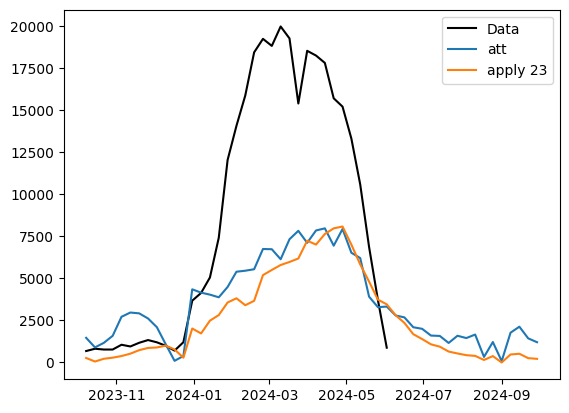

In [15]:
fig,ax = plt.subplots()

ax.plot(data_w_24.casos, color = 'black', label = 'Data')

ax.plot(df_preds_24_1.dates, df_preds_24_1.preds, label = 'att')

ax.plot(df_preds.dates, df_preds.preds, label = 'apply 23')

ax.legend()
plt.show()